# Image Processing Module 5: The Power of Thresholds

### Purpose: To introduce the concepts of thresholds within image processing

Created by: Hawley Helmbrecht

Creation Date: 07/21/2020

Last Update:

*Step 1: Necessary Imports*

In [4]:
import numpy as np
from skimage import io #importing a specific module from scikit-imgae

import matplotlib.pyplot as plt

*Step 2: User Inputs*

In [6]:
#replace the example path from my computer with the path to the image on your computer

cell_im_location = '/Users/hhelmbre/Desktop/packages/textile/example_data/ogd_cells.tif'

Note: The cell image being read in is from the OGD Severity study by Rick Liao, Andrea Joseph, Mengying Zhang, Mike McKenna, Jeremy Filteau, and Hawley Helmbrecht within the Nance lab. It is an image taken from the thalamus with a costain DAPI/PI/Iba

*Step 3: Read in the Image*

In [7]:
cell_im = io.imread(cell_im_location)

*Step 4: Viewing the Image*

You may have noticed that this module is starting out the exact same as lesson 4 - and that's because we are going to continue using the same image to solidfy and connect concepts of image procesing on multiple levels. 

Even though we already know what this image looks like from our previous module. It is good practice to always view your images to make sure that what you expect to happen is what the computer is actually encountering.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


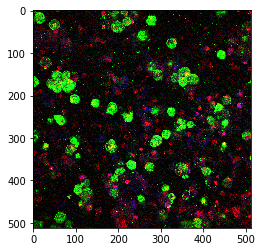

In [8]:
plt.imshow(cell_im)

*Step 5: Splitting our channels for Thresholding*

When we threshold, we threshold our color channel separately. They were acquired by different lasers on our confocal and have individual optimal settings for the best (and still accurate) threshold.

In [10]:
red_cell_im = cell_im[:,:, 0]
green_cell_im = cell_im[:,:,1]
blue_cell_im = cell_im[:,:,2]

Viewing our split channels in grey scale (code from Module 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


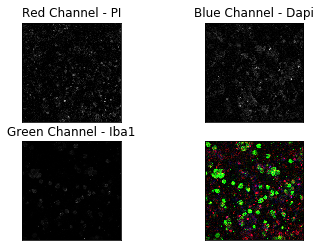

In [11]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(red_cell_im, cmap='gray')
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].set_title('Red Channel - PI')


ax[1,0].imshow(green_cell_im, cmap='gray')
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].get_yaxis().set_visible(False)
ax[1,0].set_title('Green Channel - Iba1')

ax[0,1].imshow(blue_cell_im, cmap='gray')
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].set_title('Blue Channel - Dapi')

ax[1,1].imshow(cell_im)
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].get_yaxis().set_visible(False)

*Step 6: A Basic Threshold*

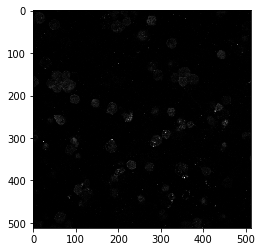

In [23]:
plt.imshow(green_cell_im, cmap='gray')

After plotting the green channel only above you may realize that what you are seeing doesn't coincide well with the all channel image. In the all channel image, there is clearly a lot of green, but when you are only looking at the green channel barely anything shows up.

This is actually an example of a certain kind of threshold. When Matplotlib takes in color images, it will scale the values from 0 to 1 by default based on the first input that it encounters for single channels. We can overcome this "threshold" by specifynig that we want to display our values from 0 to 255 with the vmin and vmax values below  

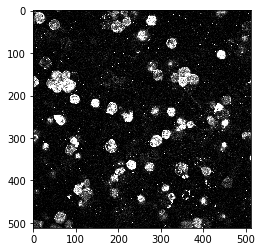

In [43]:
plt.imshow(green_cell_im, cmap='gray', vmin=0, vmax=255)

!!!Wow doesn't that look different!!  You can see some gradients from black to white! 

What is important to note about this difference that the way that matplot lib shows up the image doesn't change the actual values of the image at all - it *ONLY* changes how we view it.

We can check this by noting that in neither of the plt.imshow code is the green_cell_im redefined. 

Let's plot both viewing instances again and check the variable immediately after viewing them.

First, with the matplot lib automatic viewing settings

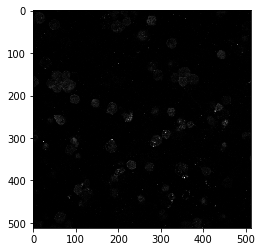

In [28]:
plt.imshow(green_cell_im, cmap='gray')

In [27]:
green_cell_im

array([[ 25, 101,  65, ...,  16,  11,   0],
       [122, 136,  74, ...,  14,   8,  11],
       [ 29,  84, 111, ...,  22,   0,  15],
       ...,
       [ 22, 140,  78, ...,  11,   7,   0],
       [ 80,  59, 102, ...,   8,  11,  15],
       [ 27,  52,  27, ...,   0,   1,   0]], dtype=uint16)

Then, let's check with our specified vmin and vmax

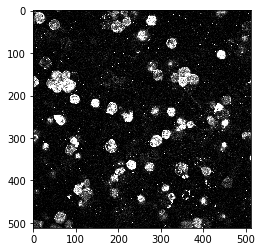

In [29]:
plt.imshow(green_cell_im, cmap='gray', vmin=0, vmax=255)

In [30]:
green_cell_im

array([[ 25, 101,  65, ...,  16,  11,   0],
       [122, 136,  74, ...,  14,   8,  11],
       [ 29,  84, 111, ...,  22,   0,  15],
       ...,
       [ 22, 140,  78, ...,  11,   7,   0],
       [ 80,  59, 102, ...,   8,  11,  15],
       [ 27,  52,  27, ...,   0,   1,   0]], dtype=uint16)

So let's go ahead and specify our vmin and vmax for a better visualization of what we are working with on all our images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


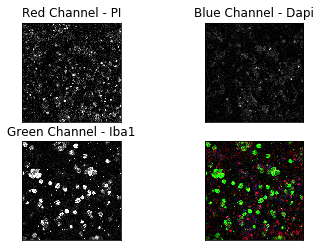

In [25]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(red_cell_im, cmap='gray', vmin=0, vmax=255)
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].set_title('Red Channel - PI')


ax[1,0].imshow(green_cell_im, cmap='gray', vmin=0, vmax=255)
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].get_yaxis().set_visible(False)
ax[1,0].set_title('Green Channel - Iba1')

ax[0,1].imshow(blue_cell_im, cmap='gray', vmin=0, vmax=255)
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].set_title('Blue Channel - Dapi')

ax[1,1].imshow(cell_im, vmin=0, vmax=255)
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].get_yaxis().set_visible(False)

This looks very differen't than what we saw before!! But it also seems to match our all channel image better!

This will have introduced you to the power of what those imaging thresholds hold when viewing images with changing any values, but let's go ahead and mess with it a little more.

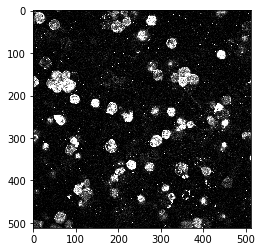

In [33]:
plt.imshow(green_cell_im, cmap='gray', vmin=0, vmax=255)

For reference above, we plotting our image with our min and max pixel values.  Let's mess with those values to see what happens.

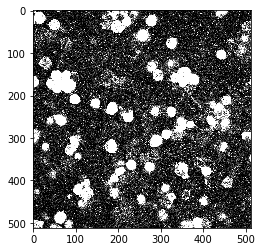

In [38]:
plt.imshow(green_cell_im, cmap='gray', vmin=0, vmax=50)

Text(0.5, 1.0, 'vmin=0, vmax=10')

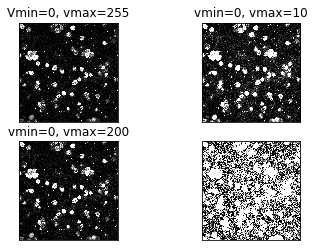

In [39]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(green_cell_im, cmap='gray', vmin=0, vmax=255)
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].set_title('Vmin=0, vmax=255')


ax[1,0].imshow(green_cell_im, cmap='gray', vmin=0, vmax=200)
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].get_yaxis().set_visible(False)
ax[1,0].set_title('vmin=0, vmax=200')

ax[0,1].imshow(green_cell_im, cmap='gray', vmin=0, vmax=100)
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].set_title('vmin=0, vmax=100')

ax[1,1].imshow(green_cell_im, cmap='gray', vmin=0, vmax=10)
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].get_yaxis().set_visible(False)
ax[0,1].set_title('vmin=0, vmax=10')

Above we only messed with the vmax - what about if we mess with the vmin as well?? 

Text(0.5, 1.0, 'vmin=5, vmax=10')

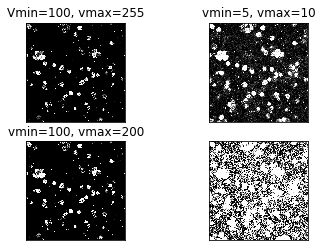

In [41]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(green_cell_im, cmap='gray', vmin=100, vmax=255)
ax[0,0].get_xaxis().set_visible(False)
ax[0,0].get_yaxis().set_visible(False)
ax[0,0].set_title('Vmin=100, vmax=255')


ax[1,0].imshow(green_cell_im, cmap='gray', vmin=100, vmax=200)
ax[1,0].get_xaxis().set_visible(False)
ax[1,0].get_yaxis().set_visible(False)
ax[1,0].set_title('vmin=100, vmax=200')

ax[0,1].imshow(green_cell_im, cmap='gray', vmin=0, vmax=100)
ax[0,1].get_xaxis().set_visible(False)
ax[0,1].get_yaxis().set_visible(False)
ax[0,1].set_title('vmin=50, vmax=100')

ax[1,1].imshow(green_cell_im, cmap='gray', vmin=0, vmax=10)
ax[1,1].get_xaxis().set_visible(False)
ax[1,1].get_yaxis().set_visible(False)
ax[0,1].set_title('vmin=5, vmax=10')

__Recall Activity:__ With what you have learned about threshold cutoffs, how do you think this would affect scientific results and analysis? Share with the group!

Next Module: Advanced Thresholding Methods - a mathematical way of getting an optimal threshold!